In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_data = pd.read_csv(r'C:\Users\shabn\Downloads\train_LZdllcl.csv')

In [7]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
train_data.shape

(54808, 14)

In [17]:
train_data['education'].fillna(train_data['education'].mode()[0],inplace = True)

In [19]:
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median(), inplace=True)

In [21]:
train_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
train_data['department'] = le.fit_transform(train_data['department'])
train_data['region'] = le.fit_transform(train_data['region'])
train_data['education'] = le.fit_transform(train_data['education'])
train_data['gender'] = le.fit_transform(train_data['gender'])
train_data['recruitment_channel'] = le.fit_transform(train_data['recruitment_channel'])


In [27]:
train_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,0,45,0


In [29]:
x = train_data.drop(['employee_id','is_promoted'],axis=1)
y=train_data['is_promoted']

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [33]:
scaled_data = scaler.transform(x)

In [35]:
type(scaled_data)

numpy.ndarray

In [37]:
scaled_data = pd.DataFrame(scaled_data)

In [39]:
type(scaled_data)

pandas.core.frame.DataFrame

In [40]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667
1,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000
2,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333
3,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333
4,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.000,0.151515,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000
54804,0.500,0.575758,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333
54805,0.000,0.000000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667
54806,0.875,1.000000,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000


In [41]:
scaled_data.columns

RangeIndex(start=0, stop=12, step=1)

In [45]:
scaled_data.columns=['department', 'region', 'education', 'gender','recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']

In [47]:
scaled_data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667
1,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000
2,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333
3,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333
4,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.000,0.151515,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000
54804,0.500,0.575758,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333
54805,0.000,0.000000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667
54806,0.875,1.000000,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000


In [49]:
x1 = train_data.drop('is_promoted',axis=1)
y1 = train_data['is_promoted']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [56]:
submission = pd.DataFrame(zip(train_data['employee_id'],y_pred_rf), columns=['employee_id','is_promoted'])

In [59]:
submission

,employee_id,is_promoted
0,65438,0
1,65141,0
2,7513,0
3,2542,0
4,48945,0
...,...,...
10957,31717,0
10958,13135,0
10959,72329,0
10960,46007,0


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [63]:
print('Accuracy is : ',accuracy_score(y_test,y_pred_rf))
print('Precision is : ',precision_score(y_test,y_pred_rf,average = 'micro'))
print('Recall is : ',recall_score(y_test,y_pred_rf,average='micro'))
print('F1 Score is : ',f1_score(y_test,y_pred_rf,average = 'micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_rf))

Accuracy is :  0.9353220215289181
Precision is :  0.9353220215289181
Recall is :  0.9353220215289181
F1 Score is :  0.9353220215289181
confusion matrix is :  [[9993   61]
 [ 648  260]]


# Test Data

In [66]:
test_data = pd.read_csv(r'C:\Users\shabn\Downloads\test_2umaH9m.csv')

In [68]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [70]:
test_data.shape

(23490, 13)

In [72]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [76]:
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [78]:
test_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median(), inplace=True)

In [80]:
test_data['education'].fillna(train_data['education'].mode()[0],inplace = True)

In [82]:
test_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [84]:
categ_feature2 = [feature for feature in test_data.columns if test_data[feature].dtype=='O']

In [86]:
categ_feature2

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [92]:
test_data[feature]=test_data[feature].astype(str)

In [94]:
for feature in categ_feature2:
    le = LabelEncoder()
    test_data[feature]=le.fit_transform(test_data[feature])

In [96]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,1,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,1,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,1,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,1,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,1,1,2,1,30,4.0,7,0,0,61


In [98]:
from sklearn.cluster import KMeans

In [100]:
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans = kmeans.fit(test_data)
    wcss.append(kmeans.inertia_)

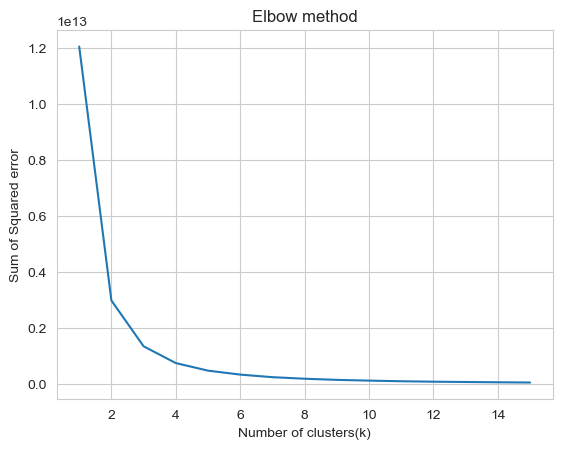

In [101]:
sns.set_style("whitegrid")
g = sns.lineplot(x=range(1,16), y=wcss)

g.set(xlabel = "Number of clusters(k)",
      ylabel = "Sum of Squared error",
     title = "Elbow method")
plt.show()

In [104]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(test_data)

In [106]:
y_kmeans

array([1, 0, 0, ..., 2, 1, 1])

In [108]:
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(test_data,y_kmeans)

In [109]:
sil_kmeans

0.5871723568523523

In [112]:
import scipy.cluster.hierarchy as sch

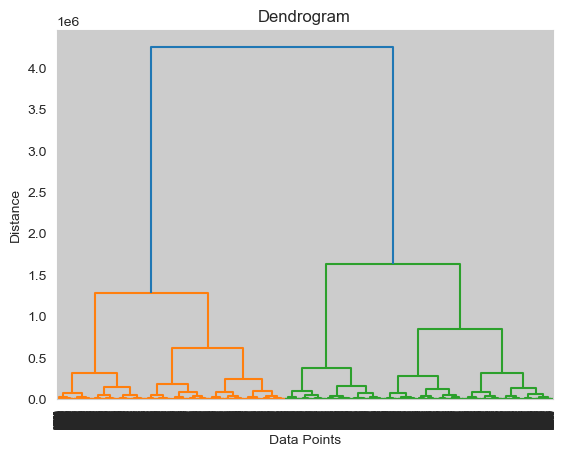

In [114]:
dg = sch.dendrogram(sch.linkage(test_data,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [116]:
from sklearn.cluster import AgglomerativeClustering

In [118]:
ahc = AgglomerativeClustering(n_clusters = 2,metric = 'euclidean',linkage = 'ward')
y_ahc = ahc.fit_predict(test_data)

In [120]:
y_ahc

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [124]:
sil_ahc = silhouette_score(test_data,y_ahc)
sil_ahc 

0.6252696016401404

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [128]:
rf_cls2 = RandomForestClassifier()
rf_cls2 = rf_cls2.fit(x_train,y_train)
y_pred_rf2 = rf_cls2.predict(x_test)

In [132]:
sample_submission = pd.DataFrame(zip(test_data['employee_id'],[y_pred_rf2]), columns=['employee_id','is_promoted'])

In [136]:
sub_file = pd.read_csv(r'C:\Users\shabn\Downloads\sample_submission_M0L0uXE (1).csv')

In [138]:
sub_file.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [140]:
sub_file.shape

(23490, 2)

In [144]:
sub_file.to_csv('sample_submission.csv',index=True)

In [146]:
a=pd.read_csv(r'sample_submission.csv')

In [148]:
a.head()

,Unnamed: 0,employee_id,is_promoted
0,0,8724,0
1,1,74430,0
2,2,72255,0
3,3,38562,0
4,4,64486,0


In [150]:
a.nunique()

Unnamed: 0     23490
employee_id    23490
is_promoted        2
dtype: int64